In [1]:
from konlpy.tag import Hannanum
from tqdm import tqdm, tqdm_pandas
import pandas as pd

In [2]:
df=pd.read_csv("./labeled_news.csv", index_col=0)
df.head()

,stock_id,text,date,token,stopword_tokened,stock_name,category,label
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,"개최, 바, 미간, 기업홍보, 유입, 활동, 활발, 유통산업, 기술, 며, 기획, ...","개최, 바, 미간, 기업홍보, 유입, 활동, 활발, 유통산업, 기술, 며, 기획, ...",하이트진로,생활소비재,1
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,"나서, 벌, 관행, 기업, 안정성, 특고다, 투, 언급, 제도개선, 청구, 최대, ...","나서, 벌, 관행, 기업, 안정성, 특고다, 투, 언급, 제도개선, 청구, 최대, ...",하이트진로,생활소비재,1
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,"기준, 45, 바, 차, 부가세, 9, 약세, 기, 3월, 며, 2000억원, 집계...","기준, 45, 바, 차, 부가세, 9, 약세, 기, 3월, 며, 2000억원, 집계...",하이트진로,생활소비재,1
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,"보수적, 나서, 수입맥주, 우리나라, 선도, 유일, 5정도, 사건, 되, 역사, 같...","보수적, 나서, 수입맥주, 우리나라, 선도, 유일, 5정도, 사건, 되, 역사, 같...",하이트진로,생활소비재,1
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,"끼치, 바, 4월, 61, 활동, 감소, 증, 74, 풀이, 판매량, 기, 보이, ...","끼치, 바, 4월, 61, 활동, 감소, 증, 74, 풀이, 판매량, 기, 보이, ...",하이트진로,생활소비재,1


In [3]:
df.isna().sum()

stock_id            0
text                0
date                0
token               0
stopword_tokened    0
stock_name          0
category            0
label               0
dtype: int64

In [4]:
df=df.drop(['token', "stopword_tokened"], axis=1)
df.head()

,stock_id,text,date,stock_name,category,label
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,하이트진로,생활소비재,1
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,하이트진로,생활소비재,1
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,하이트진로,생활소비재,1
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,하이트진로,생활소비재,1
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,하이트진로,생활소비재,1


## 한나눔 토큰화 진행

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132336 entries, 0 to 132336
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   stock_id    132336 non-null  int64 
 1   text        132336 non-null  object
 2   date        132336 non-null  object
 3   stock_name  132336 non-null  object
 4   category    132336 non-null  object
 5   label       132336 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.1+ MB


In [8]:
han=Hannanum()

In [11]:
# 토큰화 진행 (명사만 추출)

def preprocessing(texts):
    token_list=han.nouns(texts)
    return token_list

tqdm.pandas()
df['token']=df['text'].progress_apply(preprocessing)

100%|███████████████████████████████████████████████████████████████████████| 132336/132336 [10:30:07<00:00,  3.50it/s]


In [12]:
df.to_csv("./tokenized_labeled_data.csv")  
# 한나눔 토크나이저로 명사만 추출한 데이터 저장!

## 한글자, 숫자포함 문자열, 불용어 모두 제거

In [9]:
stopword=pd.read_csv("./data/stopword.csv", encoding="cp949", index_col=0)
stopword.head()

,stopword
0.0,으로서
1.0,무엇때문에
2.0,조금
3.0,소인
4.0,헉헉


In [10]:
len(stopword)

837

In [11]:
import re
from tqdm import tqdm
import ast

In [12]:
# 한 글자와 숫자 있는 데이터, 불용어까지 제거!
def remove_stopwords(texts):
    tokens=ast.literal_eval(texts)
    tokens_list = [tok for tok in tokens if 1 < len(tok)]
    pattern = re.compile(r'\d')
    tokens_of_list=[tokened for tokened in tokens_list if not re.search(pattern, tokened)]
    stopwords = set(stopword['stopword'].tolist())
    except_stopword= [tokk for tokk in tokens_of_list if tokk not in stopwords]   
    return except_stopword

In [13]:
tqdm.pandas()
df['token_list'] = df.token.progress_apply(remove_stopwords)
df

100%|█████████████████████████████████████████████████████████████████████████| 132336/132336 [06:04<00:00, 362.72it/s]


,stock_id,text,date,stock_name,category,label,token,token_list
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,하이트진로,생활소비재,1,"['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',...","[안호근, 한국농업기술진흥원, 원장, 안호근, 한국농업기술진흥원, 원장, 첨단기술,..."
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,하이트진로,생활소비재,1,"['김성희', '노동대학원', '교수', '한국', '불안정한', '노사관계', '...","[김성희, 노동대학원, 교수, 불안정한, 노사관계, 심각, 취약계층, 중심, 정책,..."
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,하이트진로,생활소비재,1,"['내수용', '공장', '출고', '수출용', '평균', '계약단', '기준', ...","[내수용, 출고, 수출용, 평균, 계약단, 내수용, 출고가, 관세, 교육세, 부가세..."
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,하이트진로,생활소비재,1,"['대기업', '브랜드', '밀맥주', '카스', '화이트', '유흥시장', '중심...","[대기업, 밀맥주, 카스, 화이트, 유흥시장, 중심, 마케팅, 밀맥주, 소홀, 가정..."
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,하이트진로,생활소비재,1,"['켈리', '재판매', '금지', '류난영', '기', '하이트진로', '맥주',...","[켈리, 재판매, 금지, 류난영, 하이트진로, 맥주, 켈리, 롯데칠성음료, 소주, ..."
...,...,...,...,...,...,...,...,...
132332,402340,LG에너지솔루션 개인 순매수 1위 3일 코스피지수가 1 가까이 하락했다 이날 코스피...,2023-05-03,SK스퀘어,정보기술,1,"['에너지솔루션', '개', '순매수', '1위', '3', '코스피지수', '1'...","[에너지솔루션, 코스피지수, 코스피지수, 동반, 매도세, 장중, 업종별, 비금속광물..."
132333,402340,투자금은 자산 매각으로 마련하라 SK그룹 투자 신중론 회장 지시 자금 조달 빨간불...,2023-05-03,SK스퀘어,정보기술,1,"['투자금', '자산', '매각', '마련', '그룹', '투', '신중론', '회...","[투자금, 자산, 매각, 신중론, 지시, 자금, 조달, 빨간불, 대규모, 성사, 고..."
132334,402340,차세대 유니콘으로 기대를 받다 경영난으로 고강도 구조조정에 돌입한 그린랩스가 최대주...,2023-05-03,SK스퀘어,정보기술,1,"['차세대', '유니콘', '기대', '경영난', '고강도', '구조조정', '돌입...","[차세대, 유니콘, 기대, 경영난, 고강도, 구조조정, 돌입, 그린랩스, 최대주주,..."
132335,402340,포스코퓨처엠 개인 순매수 1위 코스피가 2일 외국인과 기관의 매수세에 힘입어 상승하...,2023-05-02,SK스퀘어,정보기술,1,"['포스코퓨처엠', '개', '순매수', '1위', '코스피', '2', '외국인'...","[포스코퓨처엠, 코스피, 수세, 안착했다, 코스피, 거래일, 업종별, 의료정밀, 섬..."


In [4]:
import pandas as pd
ddff=pd.read_csv("final_again.csv", index_col=0)
ddff.head()

,stock_id,text,date,stock_name,category,label,token,token_list
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,하이트진로,생활소비재,1,"['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',...","['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',..."
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,하이트진로,생활소비재,1,"['김성희', '노동대학원', '교수', '한국', '불안정한', '노사관계', '...","['김성희', '노동대학원', '교수', '불안정한', '노사관계', '심각', '..."
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,하이트진로,생활소비재,1,"['내수용', '공장', '출고', '수출용', '평균', '계약단', '기준', ...","['내수용', '출고', '수출용', '평균', '계약단', '내수용', '출고가'..."
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,하이트진로,생활소비재,1,"['대기업', '브랜드', '밀맥주', '카스', '화이트', '유흥시장', '중심...","['대기업', '밀맥주', '카스', '화이트', '유흥시장', '중심', '마케팅..."
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,하이트진로,생활소비재,1,"['켈리', '재판매', '금지', '류난영', '기', '하이트진로', '맥주',...","['켈리', '재판매', '금지', '류난영', '하이트진로', '맥주', '켈리'..."


In [7]:
ddff.iloc[:,[0,1,2,3,4,7]]

,stock_id,text,date,stock_name,category,token_list
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,하이트진로,생활소비재,"['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',..."
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,하이트진로,생활소비재,"['김성희', '노동대학원', '교수', '불안정한', '노사관계', '심각', '..."
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,하이트진로,생활소비재,"['내수용', '출고', '수출용', '평균', '계약단', '내수용', '출고가'..."
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,하이트진로,생활소비재,"['대기업', '밀맥주', '카스', '화이트', '유흥시장', '중심', '마케팅..."
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,하이트진로,생활소비재,"['켈리', '재판매', '금지', '류난영', '하이트진로', '맥주', '켈리'..."
...,...,...,...,...,...,...
132332,402340,LG에너지솔루션 개인 순매수 1위 3일 코스피지수가 1 가까이 하락했다 이날 코스피...,2023-05-03,SK스퀘어,정보기술,"['에너지솔루션', '코스피지수', '코스피지수', '동반', '매도세', '장중'..."
132333,402340,투자금은 자산 매각으로 마련하라 SK그룹 투자 신중론 회장 지시 자금 조달 빨간불...,2023-05-03,SK스퀘어,정보기술,"['투자금', '자산', '매각', '신중론', '지시', '자금', '조달', '..."
132334,402340,차세대 유니콘으로 기대를 받다 경영난으로 고강도 구조조정에 돌입한 그린랩스가 최대주...,2023-05-03,SK스퀘어,정보기술,"['차세대', '유니콘', '기대', '경영난', '고강도', '구조조정', '돌입..."
132335,402340,포스코퓨처엠 개인 순매수 1위 코스피가 2일 외국인과 기관의 매수세에 힘입어 상승하...,2023-05-02,SK스퀘어,정보기술,"['포스코퓨처엠', '코스피', '수세', '안착했다', '코스피', '거래일', ..."


## 토픽 모델링 시작

In [14]:
import numpy as np
import pandas as pd
import warnings # 경고 메시지 무시
warnings.filterwarnings(action='ignore')
from gensim import corpora # 단어 빈도수 계산 패키지
import gensim # LDA 모델 활용 목적
import pyLDAvis.gensim_models # LDA 시각화용 패키지
from collections import Counter # 단어 등장 횟수 카운트

In [15]:
NUM_TOPICS = 5 # 토픽 개수는 하이퍼파라미터
# passes: 딥러닝에서 Epoch와 같은 개념으로, 전체 corpus로 모델 학습 횟수 결정
PASSES = 15

## 토픽 별 구성 단어 비율 출력

In [16]:
def lda_by_category(dataset):
    unique_categories = dataset['category'].unique()

    for category in unique_categories:
        category_data = dataset[dataset['category'] == category]
        review_prep = category_data['token_list'].tolist()
        
        # 단어 인코딩 및 빈도수 계산
        dictionary = corpora.Dictionary(review_prep)
        corpus = [dictionary.doc2bow(review) for review in review_prep]
        
        # LDA 모델 학습
        model = gensim.models.ldamodel.LdaModel(corpus, 
                                                num_topics=NUM_TOPICS, 
                                                id2word=dictionary, 
                                                passes=PASSES)
        
        # 각 토픽의 구성 단어 출력 및 저장
        topics = model.show_topics(num_topics=NUM_TOPICS, num_words=10, formatted=False)
        topic_words = []
        for topic in topics:
            words = [word for word, prop in topic[1]]
            topic_words.append(words)
        
        topic_prop = pd.DataFrame(topic_words, columns=[f"word_{i+1}" for i in range(10)])
        topic_prop.to_csv(f'./topic_words/topic_words_{category}.csv', index=False)
        display(topic_prop)


## LDA 토픽 모델링 결과 시각화

In [17]:
def lda_visualize(model, dictionary, category):
    pyLDAvis.enable_notebook()
    category_data = df[df['category'] == category]
    review_prep = category_data['token_list'].tolist()
    corpus = [dictionary.doc2bow(token) for token in review_prep]
    
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    
    # 시각화 결과 저장
    RESULT_FILE = f'./result/lda_result_{category}.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)


In [18]:
from tqdm import tqdm, tqdm_pandas
tqdm.pandas()

def process_category(category):
    category_data = df[df['category'] == category]
    review_prep = category_data['token_list'].tolist()

    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]

    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics=NUM_TOPICS, 
                                            id2word=dictionary, 
                                            passes=PASSES)

    # 시각화 실행
    lda_visualize(model, dictionary, category)



In [19]:
df=df.replace("에너지/화학","에너지_화학")
df=df.replace("철강/소재","철강_소재")
df.head()

,stock_id,text,date,stock_name,category,label,token,token_list
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,하이트진로,생활소비재,1,"['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',...","[안호근, 한국농업기술진흥원, 원장, 안호근, 한국농업기술진흥원, 원장, 첨단기술,..."
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,하이트진로,생활소비재,1,"['김성희', '노동대학원', '교수', '한국', '불안정한', '노사관계', '...","[김성희, 노동대학원, 교수, 불안정한, 노사관계, 심각, 취약계층, 중심, 정책,..."
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,하이트진로,생활소비재,1,"['내수용', '공장', '출고', '수출용', '평균', '계약단', '기준', ...","[내수용, 출고, 수출용, 평균, 계약단, 내수용, 출고가, 관세, 교육세, 부가세..."
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,하이트진로,생활소비재,1,"['대기업', '브랜드', '밀맥주', '카스', '화이트', '유흥시장', '중심...","[대기업, 밀맥주, 카스, 화이트, 유흥시장, 중심, 마케팅, 밀맥주, 소홀, 가정..."
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,하이트진로,생활소비재,1,"['켈리', '재판매', '금지', '류난영', '기', '하이트진로', '맥주',...","[켈리, 재판매, 금지, 류난영, 하이트진로, 맥주, 켈리, 롯데칠성음료, 소주, ..."


In [87]:
df.to_csv("final_again.csv")

In [21]:
# 데이터프레임 'dataset'을 사용하여 토픽 모델링과 시각화 실행
# tqdm_pandas를 사용하여 진행 상태를 표시하면서 작업 실행
tqdm.pandas()
lda_by_category(df)

,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,출시,이마트,편의점,롯데웰푸드,신세계,제일제당,베트남,멤버십,소비자들,식품
1,가능,친환경,아파트,에너지,글로벌,도입,인근,롯데,설치,프로그램
2,영업이익,농심,롯데웰푸드,편의점,삼양식품,영향,평균,오뚜기,아이스크림,밀가루
3,중국,화장품,쿠팡,아모레퍼시픽,LG생활건강,뷰티,제일제당,미국,글로벌,일본
4,전기요금,에너지,요금,전기,아스파탐,가스공사,전력,한국전력,삼성전자,가스요금


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,미국,글로벌,치료제,임상,신약,삼성바이오로직스,허가,의약품,셀트리온,바이오시밀러
1,삼성전자,순위,기부,스타트업,글로벌,삼성,조사,나눔키오스크,평가,바이오헬스
2,상장,자금,셀트리온,보유,합병,공시,SK팜테코,유상증자,설명,자사주
3,코스피,강세,미국,코스닥,삼성전자,삼성바이오로직스,SK하이닉스,상위,에너지솔루션,업종
4,백신,바이오사이언스,글로벌,녹십자,접종,스카이코비원,의약품,목표,체결,독감


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,대한항공,아시아나항공,노선,합병,항공사,어린이날,매각,삼성물산,항공기,미국
1,발사,누리호,위성,우주,한화에어로스페이스,한화시스템,발사체,성공,제작,차세대
2,폴란드,글로벌,수출,방산,에너지,한화오션,체결,미래,시스템,강화
3,코스피,삼성전자,코스닥,미국,에너지솔루션,강세,SK하이닉스,에코프로비엠,상위,약세
4,배터리,에너지솔루션,전기차,미국,중국,양극재,영업이익,글로벌,삼성SDI,SK온


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,두산에너빌리티,원전,수소,에너지,두산,폴란드,글로벌,우크라,베트남,건설
1,한화오션,현대중공업,방산,한화그룹,대우조선해양,한화,잠수함,함정,수출,호위함
2,영업이익,삼성중공업,코스피,선박,HD한국조선해양,삼성전자,중국,미국,두산밥캣,조선
3,선박,HD한국조선해양,엔진,운반선,현대중공업,발사,현대,친환경,미국,메탄올
4,현대중공업,노조,한화오션,파업,현대,조선업,조선업계,삼성중공업,조선,노사


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,코스피,삼성전자,SK하이닉스,코스닥,에너지솔루션,강세,에코프로비엠,미국,상위,반도체
1,한화오션,현대,현대중공업,한화그룹,한화,글로벌,로봇,인재,플랫폼,최태원
2,영업이익,이노베이션,수익성,중국,부진,전환,자금,석유화학,유상증자,영향
3,수소,친환경,에너지,글로벌,현대,이노베이션,탄소,선박,재활용,태양광
4,배터리,미국,중국,전기차,반도체,SK온,글로벌,폴란드,양극재,베트남


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,글로벌,경제,베트남,장관,대한상,미래,교수,제주포럼,삼성전자,현대차
1,코스피,삼성전자,코스닥,강세,현대차,SK하이닉스,미국,상위,기아,반도체
2,영업이익,중국,매각,케이카,부진,매직,보유,중고차,수익성,설명
3,현대백화점,신세계,패션,백화점,출시,여행,명품,온라인,이마트,여름
4,전기차,현대차,기아,자동차,배터리,현대차그룹,미국,글로벌,판매량,시스템


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,글로벌,에너지,플랫폼,미국,미래,삼성전자,스타트업,삼성,로봇,강화
1,삼성전자,에어컨,출시,가전,갤럭시,신제품,올레드,냉장고,스마트폰,가능
2,배터리,전기차,스퀘어,삼성SDI,에너지솔루션,보유,상장,매각,양극재,SK쉴더스
3,코스피,삼성전자,미국,코스닥,SK하이닉스,강세,외국,상위,에코프로비엠,업종
4,반도체,삼성전자,영업이익,중국,SK하이닉스,글로벌,미국,점유율,패널,디스플레이


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,배터리,수소,고려아연,양극재,글로벌,전구체,전기차,니켈,서밋,중국
1,사외이사,포스코이앤씨,출신,고려아연,반도체,아파트,교육,신규,프로그램,더샵
2,포스코,철강,포스코그룹,친환경,포스코홀딩스,현대제철,글로벌,리튬,전환,포스코인터내셔널
3,코스피,삼성전자,코스닥,POSCO홀딩스,포스코퓨처엠,반도체,SK하이닉스,강세,미국,포스코홀딩스
4,공시,풍산,영업이익,프랑스,미국,일본,양국,대통령,재계,에너지


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,대우건설,DL이앤씨,시멘트,건설,체결,현대산업개발,에너지,강화,글로벌,친환경
1,포스코퓨처엠,코스피,양극재,배터리,미국,삼성전자,포스코홀딩스,에코프로비엠,반도체,이차전지
2,현장,GS건설,아파트,공사,발생,시공,붕괴,동영상,재시공,설계
3,공사비,현대건설,시공사,재건축,건설사,대우건설,DL이앤씨,주택,건설사들,부동산
4,분양,아파트,청약,분양가,전용면적,e편한세상,아이파크,경기,일원,평균


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,카카오,글로벌,플랫폼,디지털,강화,진출,상장,스타트업,카카오페이,시스템
1,미국,코스피,영업이익,삼성전자,반도체,중국,금리,가능성,영향,카카오
2,대출,카카오페이,금리,시중은행,대환대출,플랫폼,카카오뱅크,가능,출시,카드
3,우리금융,보험,매각,보험사,교보생명,순이익,공시,평가,생명,손해보험
4,증권사,부동산,증권,사태,키움증권,충당금,채권,증권사들,수익률,수익


,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10
0,카카오,영업이익,하이브,코스피,미국,삼성전자,네이버,중국,영향,부진
1,게임,출시,신작,넷마블,모바,콘텐츠,글로벌,엔씨소프트,크래프톤,웹툰
2,요금제,LG유플러스,알뜰폰,가입자,의원,가상자산,규제,정보,댓글,출시
3,디지털,플랫폼,클라우드,카카오모빌리티,반도체,스타트업,글로벌,인프라,대출,카카오
4,네이버,플랫폼,카카오,글로벌,콘텐츠,구글,검색,인공지능,공개,챗GPT


In [2]:
import pandas as pd
df=pd.read_csv("./for_wordcloud.csv", index_col=0)
df.head()

,stock_id,text,date,stock_name,category,label,token,token_list
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,하이트진로,생활소비재,1,"['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',...","['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',..."
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,하이트진로,생활소비재,1,"['김성희', '노동대학원', '교수', '한국', '불안정한', '노사관계', '...","['김성희', '노동대학원', '교수', '불안정한', '노사관계', '심각', '..."
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,하이트진로,생활소비재,1,"['내수용', '공장', '출고', '수출용', '평균', '계약단', '기준', ...","['내수용', '출고', '수출용', '평균', '계약단', '내수용', '출고가'..."
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,하이트진로,생활소비재,1,"['대기업', '브랜드', '밀맥주', '카스', '화이트', '유흥시장', '중심...","['대기업', '밀맥주', '카스', '화이트', '유흥시장', '중심', '마케팅..."
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,하이트진로,생활소비재,1,"['켈리', '재판매', '금지', '류난영', '기', '하이트진로', '맥주',...","['켈리', '재판매', '금지', '류난영', '하이트진로', '맥주', '켈리'..."


In [3]:
df.isna().sum()

stock_id      0
text          0
date          0
stock_name    0
category      0
label         0
token         0
token_list    0
dtype: int64

In [4]:
len(df)

132336

In [22]:
for category in df['category'].unique():
    process_category(category)

## 워드클라우드

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
from itertools import chain
from matplotlib import rc
import ast

In [3]:
import pandas as pd
data=pd.read_csv("real_final.csv", index_col=0)
data.head()

,stock_id,text,date,stock_name,category,label,token,token_list
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,하이트진로,생활소비재,1,"['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',...","['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',..."
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,하이트진로,생활소비재,1,"['김성희', '노동대학원', '교수', '한국', '불안정한', '노사관계', '...","['김성희', '노동대학원', '불안정한', '노사관계', '심각', '취약계층',..."
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,하이트진로,생활소비재,1,"['내수용', '공장', '출고', '수출용', '평균', '계약단', '기준', ...","['내수용', '출고', '수출용', '계약단', '내수용', '출고가', '관세'..."
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,하이트진로,생활소비재,1,"['대기업', '브랜드', '밀맥주', '카스', '화이트', '유흥시장', '중심...","['밀맥주', '카스', '화이트', '유흥시장', '마케팅', '밀맥주', '소홀..."
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,하이트진로,생활소비재,1,"['켈리', '재판매', '금지', '류난영', '기', '하이트진로', '맥주',...","['켈리', '재판매', '금지', '류난영', '하이트진로', '맥주', '켈리'..."


In [5]:
len(data)

132336

In [6]:
data['token_list'][0]

"['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원', '원장', '첨단기술', '기반한', '농산업', '혁신', '농산업체', '시대', '구현', '최선', '원장', '농진원', '농촌진흥청', '우수', '푸드테크', '농업인', '농산업체', '중개', '역할', '상용화', '지원자', '역할', '기술혁신', '기반한', '농업', '농진원', '코엑스', '애그테크', '푸드테크', '농식품분야', '유망', '스타트업', '기관단체', '최초', '농식품', '테크', '스타트업', '창업박람회', '박람회', '창업기업', '전시', '홍보', '상생협력', '창업', '생태계', '최적화', '기획', '호응', '박람회장', '지능형농업', '첨단식품기술', '친환경', '생명공학', '미래농업', '주제별', '기간동안', '미간', '투자자', '투자상담', '기업홍보', '활발', '투자유치', '원장', '농진원은', '창업기업', '육성', '농식품', '창업', '생태계', '중심적', '역할', '수행', '벤처창업', '적극', '최초', '농식품', '스타트업', '특화', '박람회', '준비', '박람회', '스타트업', '투자사', '전문가층', '유입', '위축', '창업', '생태계', '활성화', '변곡점', '네트워킹', '참여기업들', '호응', '상당', '스타트업', '투자IR', '투자사', '참관한', '투자상담', '품평회', '스타트업', '전문', '유통사', '농진원', '푸드테크', '스타트업', '애로사항', '자금조달', '판로개척', '돕기위해', '지원사업', '기술이전', '시제품', '마케팅', '비용', '정부자금', '제일제당', '롯데벤처스', '농협', '하이트진', '협업', '주선', '농식품', '특화', '상시', '민간자금', '안호근', '농진원장', '식품제조업', '유통산업', '생명소재산업', '농업', '후방', '망라', '농

In [7]:
def tolist(text):
    texts=ast.literal_eval(text)
    return texts

from tqdm import tqdm
tqdm.pandas()
data['token_list']=data.token_list.progress_apply(tolist)

100%|████████████████████████████████████████████████████████████████████████| 132336/132336 [00:59<00:00, 2225.93it/s]


In [8]:
data

,stock_id,text,date,stock_name,category,label,token,token_list
0,80,안호근 한국농업기술진흥원 원장 안호근 한국농업기술진흥원 원장은 첨단기술에 기반한 농...,2023-07-31,하이트진로,생활소비재,1,"['안호근', '한국농업기술진흥원', '원장', '안호근', '한국농업기술진흥원',...","[안호근, 한국농업기술진흥원, 원장, 안호근, 한국농업기술진흥원, 원장, 첨단기술,..."
1,80,김성희 고려대 노동대학원 교수 한국 불안정한 노사관계 심각한 수준 취약계층 중심의...,2023-07-31,하이트진로,생활소비재,1,"['김성희', '노동대학원', '교수', '한국', '불안정한', '노사관계', '...","[김성희, 노동대학원, 불안정한, 노사관계, 심각, 취약계층, 김성희, 노동대학원,..."
2,80,내수용은 공장 출고가 수출용은 평균 계약단가 기준 내수용 출고가에 관세 주세 교육세...,2023-07-31,하이트진로,생활소비재,1,"['내수용', '공장', '출고', '수출용', '평균', '계약단', '기준', ...","[내수용, 출고, 수출용, 계약단, 내수용, 출고가, 관세, 교육세, 부가세, 재판..."
3,80,대기업 브랜드 밀맥주 카스 화이트뿐 유흥시장 중심 마케팅에 밀맥주 소홀 가정시장 커...,2023-07-31,하이트진로,생활소비재,1,"['대기업', '브랜드', '밀맥주', '카스', '화이트', '유흥시장', '중심...","[밀맥주, 카스, 화이트, 유흥시장, 마케팅, 밀맥주, 소홀, 가정시장, 곰표, 밀..."
4,80,켈리 재판매 및 DB 금지 류난영 기자 하이트진로의 맥주 켈리 와 롯데칠성음료의 소...,2023-07-31,하이트진로,생활소비재,1,"['켈리', '재판매', '금지', '류난영', '기', '하이트진로', '맥주',...","[켈리, 재판매, 금지, 류난영, 하이트진로, 맥주, 켈리, 롯데칠성음료, 소주, ..."
...,...,...,...,...,...,...,...,...
132332,402340,LG에너지솔루션 개인 순매수 1위 3일 코스피지수가 1 가까이 하락했다 이날 코스피...,2023-05-03,SK스퀘어,정보기술,1,"['에너지솔루션', '개', '순매수', '1위', '3', '코스피지수', '1'...","[에너지솔루션, 코스피지수, 코스피지수, 동반, 매도세, 장중, 비금속광물, 음식료..."
132333,402340,투자금은 자산 매각으로 마련하라 SK그룹 투자 신중론 회장 지시 자금 조달 빨간불...,2023-05-03,SK스퀘어,정보기술,1,"['투자금', '자산', '매각', '마련', '그룹', '투', '신중론', '회...","[투자금, 자산, 신중론, 지시, 조달, 빨간불, 대규모, 성사, 고민, 자산, 성..."
132334,402340,차세대 유니콘으로 기대를 받다 경영난으로 고강도 구조조정에 돌입한 그린랩스가 최대주...,2023-05-03,SK스퀘어,정보기술,1,"['차세대', '유니콘', '기대', '경영난', '고강도', '구조조정', '돌입...","[차세대, 유니콘, 기대, 경영난, 고강도, 구조조정, 돌입, 그린랩스, 최대주주,..."
132335,402340,포스코퓨처엠 개인 순매수 1위 코스피가 2일 외국인과 기관의 매수세에 힘입어 상승하...,2023-05-02,SK스퀘어,정보기술,1,"['포스코퓨처엠', '개', '순매수', '1위', '코스피', '2', '외국인'...","[포스코퓨처엠, 코스피, 수세, 안착했다, 코스피, 거래일, 의료정밀, 섬유의복, ..."


In [ ]:
data

In [9]:
financial= data[data['category']=="금융"]

In [10]:
financial

,stock_id,text,date,stock_name,category,label,token,token_list
9928,810,금감원 연말까지 절충안 반영 직접 영향권 아닌 생보사 호실적 신한라이프 상반기 순익...,2023-07-31,삼성화재,금융,1,"['금감원', '연말', '절충안', '반영', '영향권', '생보사', '호', ...","[금감원, 연말, 절충안, 반영, 영향권, 생보사, 신한라이프, 순익, 합병, 라이..."
9929,810,서울 여의도 금융감독원 전경 뉴시스 금융감독원의 보험업계에 적용되는 신회계기준 계리...,2023-07-31,삼성화재,금융,1,"['서울', '여의', '금융감독원', '전경', '뉴시스', '금융감독원', '보...","[여의, 금융감독원, 전경, 뉴시스, 금융감독원, 보험업계, 회계기준, 계리적, 가..."
9930,810,4대 그룹 재가입 놓고 고심 8월 22일 임시총회 전까지 복귀 관련 입장 나오기 어...,2023-07-31,삼성화재,금융,1,"['4대', '그룹', '재가입', '고', '8월', '22일', '임시총회', ...","[임시총회, 복귀, 입장, 김병준, 데드라인, 롯데호텔, 전국경제인연합회, 경제동우..."
9931,810,김병준 전국경제인연합회 회장 직무대행이 7월 28일 소공동 롯데호텔에서 열린 전경련...,2023-07-31,삼성화재,금융,1,"['김병준', '전국경제인연합회', '회장', '직무대행', '7월', '28일',...","[김병준, 전국경제인연합회, 직무대행, 소공동, 롯데호텔, 일본, 경제동우회, 만찬..."
9932,810,NH 아문디자산운용 채새롬 홍유담 기자 영국의 발전소 건설 프로젝트에 약 4천억원을...,2023-07-31,삼성화재,금융,1,"['아문디자산운용', '채새롬', '홍유담', '기', '영국', '발전소', '건...","[아문디자산운용, 채새롬, 홍유담, 영국, 발전소, 보험사들, 투자금, 절반가량, ..."
...,...,...,...,...,...,...,...,...
132018,377300,전자랜드 가정의 달 맞이 오 해피 세일 진행 재판매 및 DB 금지 박미선 기자 전자...,2023-05-02,카카오페이,금융,0,"['전자랜드', '가정', '달', '맞이', '오', '해피', '세일', '진행...","[전자랜드, 가정, 맞이, 해피, 세일, 재판매, 금지, 박미선, 전자랜드, 가정,..."
132019,377300,오는 31일까지 열려 순정PC 안마의자 주방용품 등 할인 판매전자랜드가 가정의 달을...,2023-05-02,카카오페이,금융,0,"['31일', '순정PC', '안마의자', '주방용품', '등', '할', '판매전...","[순정PC, 안마의자, 주방용품, 판매전자랜드, 가정, 해피, 패밀리, 세일, 전자..."
132020,377300,스마트폰 철수로 동력 잃고 애플vs삼성 전쟁에도 고전 내달말 종료 앱은 유지 한때 ...,2023-05-01,카카오페이,금융,0,"['스마트폰', '철수', '동력', '애플vs삼성', '전쟁', '고전', '내달...","[스마트폰, 철수, 동력, 애플vs삼성, 전쟁, 고전, 내달말, 종료, 유지, 야심..."
132021,377300,나라셀라 에코아이 케이웨더 등 예비심사 청구 등 잇단 상장 추진 시장성 반영할 기준...,2023-05-01,카카오페이,금융,0,"['나라셀라', '에코아', '케이웨', '등', '예비심사', '청구', '등',...","[나라셀라, 에코아, 케이웨, 예비심사, 청구, 시장성, 반영, 시급, 동종업종, ..."


In [11]:
path='C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf'

## ['생활소비재', '헬스케어', '산업재', '중공업', '에너지/화학', '경기소비재', '정보기술', '철강/소재', '건설', '금융', '커뮤니케이션서비스'] 순서로 WordCloud

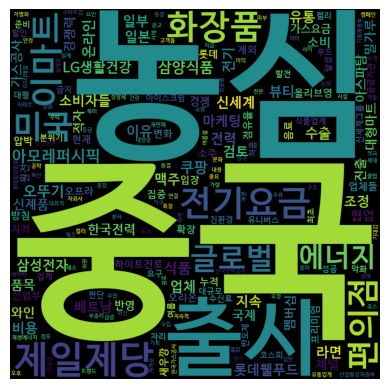

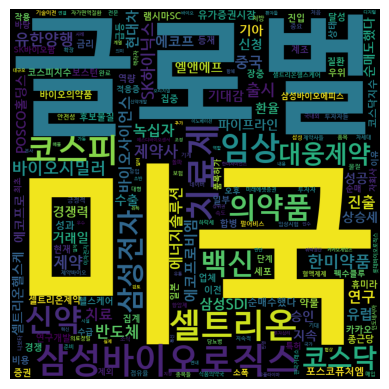

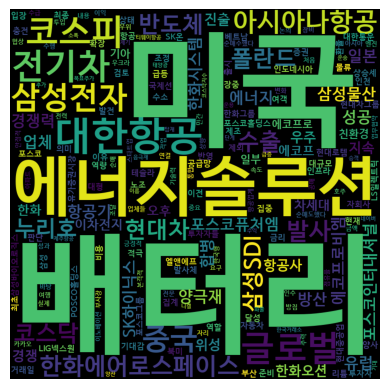

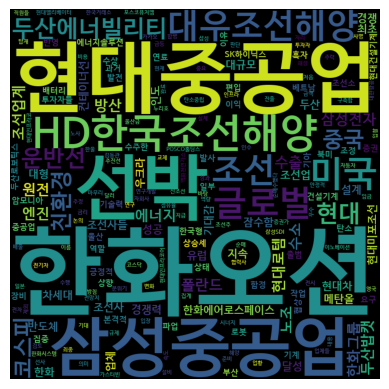

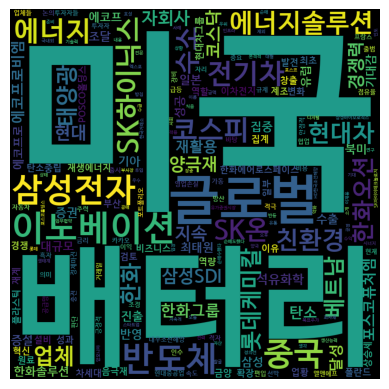

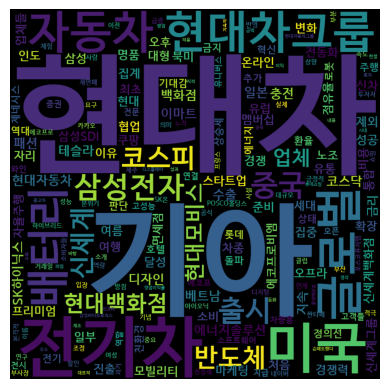

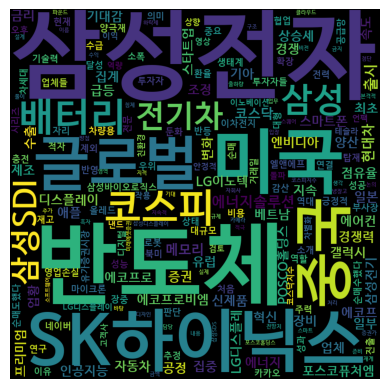

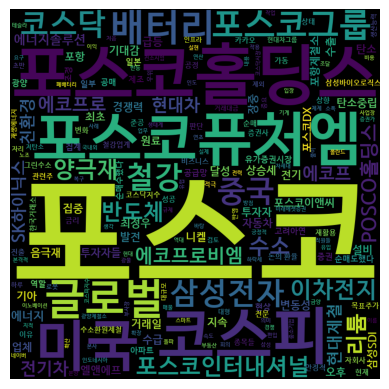

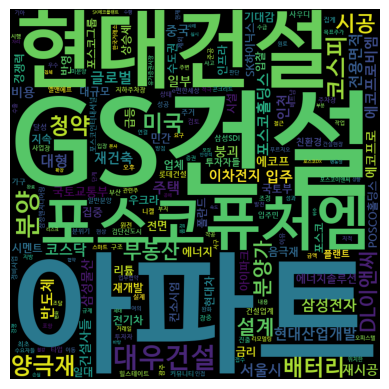

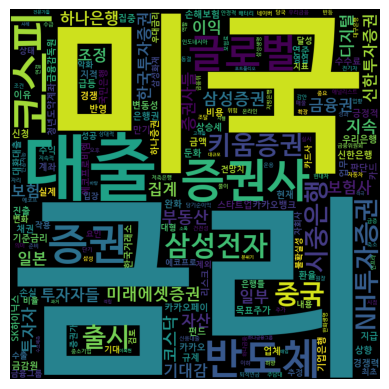

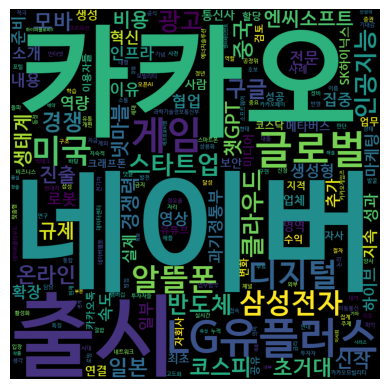

In [12]:
for category in data['category'].unique():
    df = data[data['category'] == category]
        
    words=list(chain.from_iterable(df['token_list'].tolist()))
    c=Counter(words)
    wc = WordCloud(font_path=path, width=400, height=400, scale=2, max_font_size=250, background_color="black")
    gen = wc.generate_from_frequencies(c)
    plt.figure()
    plt.imshow(gen)
    plt.axis("off")
    plt.show()


In [8]:
from konlpy.tag import Okt  
okt = Okt()  

text = "가장 유명한 100가지 명언. 하루에 3시간을 걸으면 7년 후에 지구를 한바퀴 돌 수 있다. "
print(okt.morphs(text))

['가장', '유명한', '100', '가지', '명언', '.', '하루', '에', '3시간', '을', '걸으면', '7년', '후', '에', '지구', '를', '한', '바퀴', '돌', '수', '있다', '.']


In [22]:
from konlpy.tag import Okt  
okt = Okt()  
from konlpy.tag import Komoran
komoran = Komoran()  
from konlpy.tag import Hannanum
han = Hannanum() 
from konlpy.tag import Kkma
kkma = Kkma() 

text = "데청캠 10주간 대장정의 막이 내리는 날, 모두 고생하셨습니다!"
print(okt.morphs(text))
print(komoran.morphs(text))
print(han.morphs(text))
print(kkma.morphs(text))

['데청캠', '10', '주간', '대장정', '의', '막', '이', '내리는', '날', ',', '모두', '고생', '하셨습니다', '!']
['데', '청', '캐', 'ㅁ', '10', '주간', '대', '장정', '의', '막', '이', '내리', '는', '날', ',', '모두', '고생', '하', '시', '었', '습니다', '!']
['데청캠', '10주간', '대장정', '의', '막', '이', '내리', '는', '날', ',', '모두', '고생', '하', '셨습니다', '!']
['데', '청', '캐', 'ㅁ', '10', '주간', '대장', '정의', '막이', '내리', '는', '날', ',', '모두', '고생', '하', '시', '었', '습니다', '!']
